# California house prices prediction

## **Data:**
This is a dataset from a kaggle competition:

https://www.kaggle.com/datasets/camnugent/california-housing-prices



In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
np.set_printoptions(precision=2)

### Importing the data

In [77]:
!kaggle datasets download -d camnugent/california-housing-prices

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 103MB/s]


In [78]:
! mkdir cal_data
! unzip california-housing-prices.zip -d cal_data

Archive:  california-housing-prices.zip
  inflating: cal_data/housing.csv    


In [80]:
df=pd.read_csv("/content/cal_data/housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### Data Cleaning

In [81]:
#checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* All missing values from the var "total_bedrooms"
* Using the mean() to imputate the missing values

In [82]:
df["total_bedrooms"]=df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

In [83]:
df["total_bedrooms"].isna().value_counts()

False    20640
Name: total_bedrooms, dtype: int64

### Exploratory Analysis

* data distribution

Text(0.5, 0.98, 'features distribution')

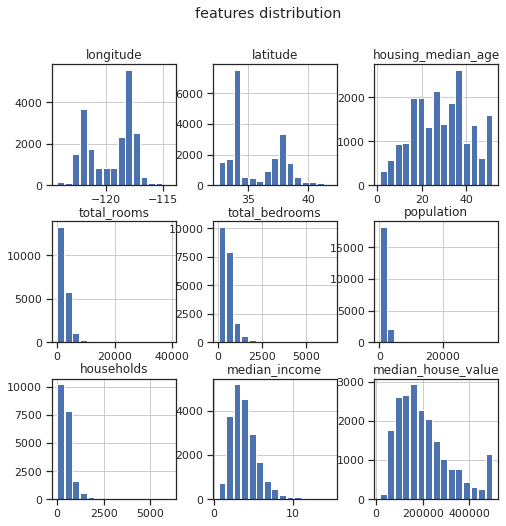

In [84]:
df.hist(bins=15,zorder=2, rwidth=0.9,figsize=(8,8))
plt.suptitle("features distribution")


* Correlation

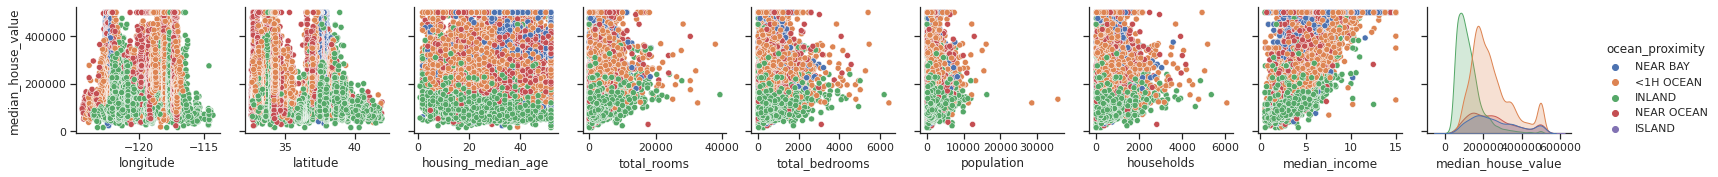

In [85]:
sns.set_theme(style="ticks")
sns.pairplot(df,y_vars=['median_house_value'], hue="ocean_proximity")

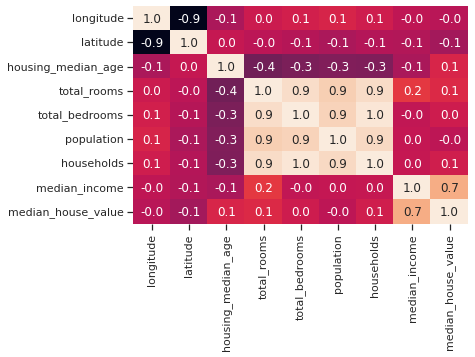

In [86]:
corr=df.corr()
sns.heatmap(corr, annot=True, fmt='.1f', cbar=False)

In [87]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Data Preparation

* Performing one-hot encoding on the categorical variable

In [88]:
dummy = pd.get_dummies(df['ocean_proximity'])
print(dummy)

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20640 rows x 5 columns]


In [89]:
df= pd.merge(
    left=df,
    right=dummy,
    left_index=True,
    right_index=True,
)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [91]:
# Droping unwanted columns
df=df.drop(columns=["ocean_proximity"])

### Splitting the data

In [93]:
X=df.drop(columns=["median_house_value"])
Y=df["median_house_value"]

In [98]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

### Check if Features Rescaling is needed

In [99]:
print(f'Ranges of features:{np.ptp(x_train,axis=0)}')

Ranges of features:[1.00e+01 9.41e+00 5.10e+01 3.26e+04 6.44e+03 3.57e+04 6.08e+03 1.45e+01
 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00]


Rescaling is needed

In [100]:
scaler = StandardScaler().fit(x_train.iloc[:, :8])
# to exclude the categorical variables from rescaling
def preprocessor(x):
  A = np.copy(x)
  A[:, :8] = scaler.transform(A[:, :8])
  return A
x_train,x_test=preprocessor(x_train),preprocessor(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [101]:
x_train

array([[ 1.  , -0.84, -1.8 , ...,  0.  ,  0.  ,  0.  ],
       [-1.43,  0.99,  1.86, ...,  0.  ,  1.  ,  0.  ],
       [ 0.78, -0.84, -0.21, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-1.17,  0.45,  0.19, ...,  0.  ,  0.  ,  1.  ],
       [ 0.81, -0.94,  0.43, ...,  0.  ,  0.  ,  0.  ],
       [ 2.  , -1.32, -1.08, ...,  0.  ,  0.  ,  0.  ]])

In [102]:
print(f'Ranges of features after:{np.ptp(x_train,axis=0)}')

Ranges of features after:[ 5.01  4.4   4.05 14.92 15.33 31.21 15.9   7.6   1.    1.    1.    1.
  1.  ]


In [103]:
x_test

array([[ 1.25, -1.43, -0.53, ...,  0.  ,  0.  ,  1.  ],
       [ 0.79, -0.8 ,  0.27, ...,  0.  ,  0.  ,  0.  ],
       [-1.14,  1.42,  0.03, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-0.68,  1.51, -1.4 , ...,  0.  ,  0.  ,  0.  ],
       [-1.19,  1.09, -0.84, ...,  0.  ,  0.  ,  0.  ],
       [ 0.68, -0.7 ,  1.86, ...,  0.  ,  0.  ,  0.  ]])

In [104]:
print(f'Ranges of features after:{np.ptp(x_test,axis=0)}')

Ranges of features after:[ 4.85  4.34  4.05 17.97 14.77 14.26 14.    7.6   1.    1.    1.    1.
  1.  ]


### Building The Model

In [105]:
sgdr=SGDRegressor(max_iter=10000)
sgdr.fit(x_train,y_train)
print(sgdr)
print(f'number of iterations:{sgdr.n_features_in_}, number of w updates:{sgdr.t_}')

SGDRegressor(max_iter=10000)
number of iterations:13, number of w updates:346753.0


### View Model Parameters

In [106]:
w=sgdr.coef_
b=sgdr.intercept_
print(f'model parameters:w:{w},   b:{b}')

model parameters:w:[-53825.11 -53995.68  13609.99  -9628.91  27931.17 -45109.    28608.47
  76475.06  49332.09  10984.95   7287.77  45699.28  55138.85],   b:[171619.79]


### Make Predictions

In [107]:
y_pred=sgdr.predict(x_test)
y_pred[:10]

array([218758.36, 291920.13, 182514.15,  88732.56, 297423.26, 207001.75,
       289039.14, 320792.81, 307854.61, 246113.96])

In [108]:
y_test[:10]

14740    136900.0
10101    241300.0
20566    200700.0
2670      72500.0
15709    460000.0
439      120000.0
845      247000.0
3768     336900.0
964      339700.0
8681     265600.0
Name: median_house_value, dtype: float64

### Model Evaluation

In [109]:
print('Mean squared error (MSE): ' ,metrics.mean_squared_error(y_test, y_pred))
print('Coefficient of determination: ', metrics.r2_score(y_test,y_pred))

Mean squared error (MSE):  4759855013.593321
Coefficient of determination:  0.6349678194281383


### Visualizing the results

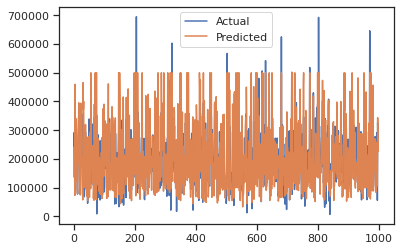

In [112]:
gr = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
gr = gr.reset_index()
gr = gr.drop(['index'],axis=1)
plt.plot(gr[:1000])
plt.legend(['Actual','Predicted'])